In [2]:
import os
from gensim import corpora, models

# Step 1: Load the movie reviews
reviews_folder = 'unsup'
reviews = []

for filename in os.listdir(reviews_folder):
    if filename.endswith(".txt"):
        filepath = os.path.join(reviews_folder, filename)
        with open(filepath, "r", encoding="utf-8") as file:
            review_text = file.read()
            reviews.append(review_text)

# Step 2: Preprocess the text data
# Tokenize, remove stopwords, and create a bag-of-words representation
tokenized_reviews = [review.split() for review in reviews]
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Step 3: Apply the LDA algorithm
num_topics = 10  # Set the desired number of topics
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Step 4: Print the topics and their representative words
for topic_id in range(num_topics):
    topic_words = lda_model.show_topic(topic_id)
    print(f"Topic #{topic_id + 1}:")
    print([word for word, _ in topic_words])
    print()

# Step 5: Infer topics for new documents
new_document = "I really enjoyed this movie. The acting was great and the plot was engaging."
new_bow = dictionary.doc2bow(new_document.split())
new_topics = lda_model.get_document_topics(new_bow)

print("Inferred Topics for New Document:")
print(new_topics)


Topic #1:
['Cinderella', 'Beatles', 'Lange', 'Lewton', 'Norris', 'Columbo', '*1/2', 'Pitt', 'Silent', 'Ninja']

Topic #2:
['.', 'war', ',', 'military', 'War', 'American', 'soldiers', 'political', 'US', 'government']

Topic #3:
['Cinderella', 'Beatles', 'Lange', 'Lewton', 'Norris', 'Columbo', '*1/2', 'Pitt', 'Silent', 'Ninja']

Topic #4:
['episodes', 'episode', 'season', 'episode.', '>', 'cartoons', 'episode,', 'Dave', 'Mulder', 'seasons']

Topic #5:
['korean', 'finishes', 'arms.', 'heros', 'bullet,', 'Finaly', 'occupation,', 'film-student', '/>camera-work', 'japanese']

Topic #6:
['Cinderella', 'Beatles', 'Lange', 'Lewton', 'Norris', 'Columbo', '*1/2', 'Pitt', 'Silent', 'Ninja']

Topic #7:
['the', 'I', 'to', 'a', 'and', 'this', 'it', 'of', 'was', 'that']

Topic #8:
['Bond,', '"Saving', 'excellent!', 'I´ve', 'Ryan"', '/>is', 'Sharpe', 'Ward', 'Silent', 'Brodie']

Topic #9:
['preposterous', 'actresses.', 'recapture', '65', 'surly', 'pass,', 'wreck,', 'Kyle', 'Judi', 'Woodstock']

Topic #

In [3]:
label_counts = {}  # Dictionary to store the counts of each label
total_documents = 0  # Variable to store the total number of documents

# Step 1: Read and parse the data from 'labelBOW.feat'
with open('MoveReview\\aclImdb\\train\\labeledBow.feat', 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            total_documents += 1
            label, word_counts = line.split(' ', 1)
            
            # Step 2: Update the counts of each label
            if label not in label_counts:
                label_counts[label] = 0
            
            # Step 3: Increment the counts for each label
            counts = [int(count.split(':')[1]) for count in word_counts.split()]
            label_counts[label] += sum(counts)

# Step 4: Calculate the purity
max_label_counts = [max(label_counts.values())] * total_documents
purity = sum(max_label_counts) / total_documents

print("Purity:", purity)


Purity: 1073054.0


In [5]:
from gensim import similarities
from sklearn.metrics.pairwise import cosine_similarity

# Step 6: Create an index for the corpus
index = similarities.MatrixSimilarity(lda_model[corpus])

# Example documents
doc1 = "i like dog"
doc2 = "i love dog"

# Preprocess and infer topics for the example documents
doc1_bow = dictionary.doc2bow(doc1.split())
doc1_topics = lda_model[doc1_bow]
doc1_topic_vector = lda_model.get_document_topics(doc1_bow, minimum_probability=0)
doc1_topic_dist = [prob for _, prob in doc1_topic_vector]

doc2_bow = dictionary.doc2bow(doc2.split())
doc2_topics = lda_model[doc2_bow]
doc2_topic_vector = lda_model.get_document_topics(doc2_bow, minimum_probability=0)
doc2_topic_dist = [prob for _, prob in doc2_topic_vector]

# Step 7: Compute the semantic similarity between the documents
similarity = cosine_similarity([doc1_topic_dist], [doc2_topic_dist])[0][0]

print("Semantic Similarity between the Documents:")
print(similarity)


Semantic Similarity between the Documents:
0.9999999


In [6]:
# !pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Step 4: Prepare data for visualization
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# Step 5: Visualize the topics
pyLDAvis.display(vis_data)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.7.0 requires gym==0.21, but you have gym 0.26.2 which is incompatible.
syft 0.5.1 requires flask<2.0.0,>=1.1.2, but you have flask 2.3.2 which is incompatible.


     ---------------------------------------- 2.6/2.6 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 10.7/10.7 MB 864.8 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 92.7/92.7 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.3
    Uninstalling pandas-1.4.3:
      Successfully uninstalled pandas-1.4.3


     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90


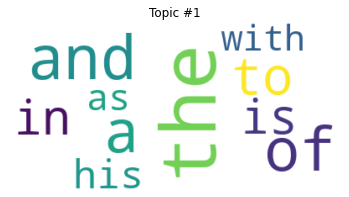

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.


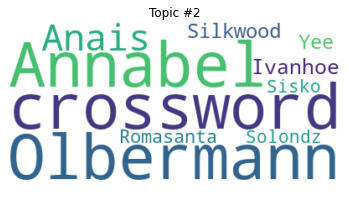

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will 

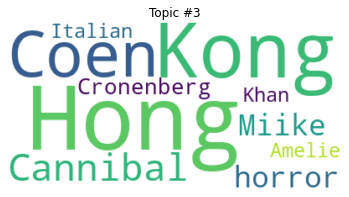

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will 

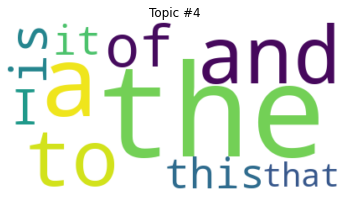

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will 

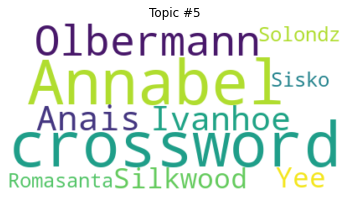

In [10]:
# !pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 4: Create word clouds for each topic
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

for topic_id, topic_words in topics:
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(dict(topic_words))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic #{topic_id + 1}")
    plt.show()
